# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 1:
Image - Min Value: 5 Max Value: 254
Image - Shape: (32, 32, 3)
Label - Label Id: 9 Name: truck


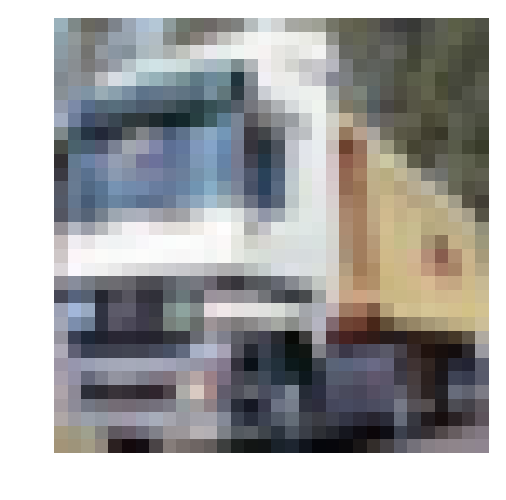

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 1
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    a = .1
    b = .9
    image_min = 0
    image_max = 255
    return a + (((x - image_min) * (b-a) )/(image_max - image_min))


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [4]:
import numpy as np
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
labels_value = range(10)
lb.fit(labels_value)
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    return lb.transform(x)
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [7]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    x = tf.placeholder(tf.float32, shape = [None,image_shape[0],image_shape[1],image_shape[2]], name = "x")
    return x


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    label_tf = tf.placeholder(tf.float32, shape=[None,n_classes], name="y")
    return label_tf


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    keep_prob = tf.placeholder(tf.float32, None, name="keep_prob")
    return keep_prob


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [55]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    dimension = x_tensor.get_shape().as_list() #create list that holds the dimensions of the input
    print(dimension)
    shape = list(conv_ksize +(dimension[-1],) + (conv_num_outputs,)) #reshape for convolution layer.
    print(shape)
    weights = tf.Variable(tf.truncated_normal(shape,0,0.05)) #set weights to a truncated normal distribution
    bias = tf.Variable(tf.zeros(conv_num_outputs)) #set biases to zero
    padding = 'SAME' #set padding to 'SAME'
    #print(weights)
    #print(bias)
    conv_layer = tf.nn.conv2d(x_tensor, weights, list((1,)+conv_strides+(1,)),padding) #use build in tensorflow conv2d 
    #print(conv_layer)
    conv_layer = tf.nn.bias_add(conv_layer, bias) #use built in tf.nn.bias_add to add the bias layer
    #print(conv_layer)
    conv_layer = tf.nn.max_pool(conv_layer,ksize=[1] + list(pool_ksize) + [1], strides =[1] + list(pool_strides) + [1], padding='SAME')
    # using the built in tf.nn.max_pool function
    conv_layer = tf.nn.relu(conv_layer) #use relu activation
    #print(conv_layer)

    print(conv_layer)
    return conv_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

[None, 32, 32, 5]
[2, 2, 5, 10]
Tensor("Relu_6:0", shape=(?, 4, 4, 10), dtype=float32)
Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [56]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    flat = tf.contrib.layers.flatten(x_tensor, None, None)
    return flat


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [57]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    ful_con = tf.contrib.layers.fully_connected(
    x_tensor,
    num_outputs,)
    return ful_con


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [58]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    ful_con = tf.contrib.layers.fully_connected(
    x_tensor,
    num_outputs,
    activation_fn=None,
    normalizer_fn=None,
    normalizer_params=None,
    )
    return ful_con


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [64]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    conv_ksize=(8,8)
    conv_num_outputs=conv_ksize[0]*conv_ksize[1] 
    conv_strides=(conv_ksize[0]/2,conv_ksize[1]/2) 
    pool_ksize=(conv_strides[0], conv_strides[1])
    pool_strides=(pool_ksize[0]/2, pool_ksize[1]/2)
    num_outputs = 10

    comax1 = conv2d_maxpool(x, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    comax2 = conv2d_maxpool(comax1, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    comax3 = conv2d_maxpool(comax2, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    flatten_layer = flatten(comax3)
    flatten_layer = tf.nn.dropout(flatten_layer,keep_prob)
    
    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    # Play around with different number of outputs
    # Function Definition from Above:

    fully_conn_layer = fully_conn(flatten_layer, num_outputs*2)
    #fully_conn_layer = tf.nn.dropout(fully_conn_layer, keep_prob)
    #fully_conn_layer = fully_conn(fully_conn_layer, num_outputs*2)
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    output_layer = output(fully_conn_layer, num_outputs)
    return output_layer
    
    
    # TODO: return output

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

[None, 32, 32, 3]
[8, 8, 3, 64]
Tensor("Relu:0", shape=(?, 4, 4, 64), dtype=float32)
[None, 4, 4, 64]
[8, 8, 64, 64]
Tensor("Relu_1:0", shape=(?, 1, 1, 64), dtype=float32)
[None, 1, 1, 64]
[8, 8, 64, 64]
Tensor("Relu_2:0", shape=(?, 1, 1, 64), dtype=float32)
[None, 32, 32, 3]
[8, 8, 3, 64]
Tensor("Relu_3:0", shape=(?, 4, 4, 64), dtype=float32)
[None, 4, 4, 64]
[8, 8, 64, 64]
Tensor("Relu_4:0", shape=(?, 1, 1, 64), dtype=float32)
[None, 1, 1, 64]
[8, 8, 64, 64]
Tensor("Relu_5:0", shape=(?, 1, 1, 64), dtype=float32)
Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [65]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function

    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})
    pass


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [66]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    loss = session.run(cost, feed_dict = {x:feature_batch, y:label_batch, keep_prob:1.})
    acc = session.run(accuracy, feed_dict = {x:feature_batch, y:label_batch, keep_prob:1.})
    val_cost, val_acc = session.run([cost, accuracy], feed_dict={x:valid_features, y:valid_labels, keep_prob:1.})
    print("Loss: " + str(loss) + " Accuracy: " + str(acc) + " Validation Loss: " + str(val_cost) + " Validation Accuracy: " + str(val_acc))

    pass

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [70]:
# TODO: Tune Parameters
epochs = 200
batch_size = 2056
keep_probability = .85

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [68]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Loss: 2.28995 Accuracy: 0.0979381 Validation Loss: 2.28899 Validation Accuracy: 0.107
Epoch  2, CIFAR-10 Batch 1:  Loss: 2.26182 Accuracy: 0.141753 Validation Loss: 2.26076 Validation Accuracy: 0.1296
Epoch  3, CIFAR-10 Batch 1:  Loss: 2.22301 Accuracy: 0.143041 Validation Loss: 2.22278 Validation Accuracy: 0.132
Epoch  4, CIFAR-10 Batch 1:  Loss: 2.17932 Accuracy: 0.167526 Validation Loss: 2.17517 Validation Accuracy: 0.155
Epoch  5, CIFAR-10 Batch 1:  Loss: 2.13688 Accuracy: 0.180412 Validation Loss: 2.12487 Validation Accuracy: 0.184
Epoch  6, CIFAR-10 Batch 1:  Loss: 2.09257 Accuracy: 0.213918 Validation Loss: 2.07663 Validation Accuracy: 0.2116
Epoch  7, CIFAR-10 Batch 1:  Loss: 2.05766 Accuracy: 0.225515 Validation Loss: 2.03824 Validation Accuracy: 0.2292
Epoch  8, CIFAR-10 Batch 1:  Loss: 2.01691 Accuracy: 0.234536 Validation Loss: 1.99447 Validation Accuracy: 0.2412
Epoch  9, CIFAR-10 Batch 1:  Loss: 1.973

Epoch 73, CIFAR-10 Batch 1:  Loss: 1.15015 Accuracy: 0.600515 Validation Loss: 1.38654 Validation Accuracy: 0.4946
Epoch 74, CIFAR-10 Batch 1:  Loss: 1.17512 Accuracy: 0.588917 Validation Loss: 1.43365 Validation Accuracy: 0.4846
Epoch 75, CIFAR-10 Batch 1:  Loss: 1.13412 Accuracy: 0.613402 Validation Loss: 1.38009 Validation Accuracy: 0.4956
Epoch 76, CIFAR-10 Batch 1:  Loss: 1.13564 Accuracy: 0.612113 Validation Loss: 1.39743 Validation Accuracy: 0.4886
Epoch 77, CIFAR-10 Batch 1:  Loss: 1.1257 Accuracy: 0.609536 Validation Loss: 1.39322 Validation Accuracy: 0.4874
Epoch 78, CIFAR-10 Batch 1:  Loss: 1.11538 Accuracy: 0.612113 Validation Loss: 1.3833 Validation Accuracy: 0.4952
Epoch 79, CIFAR-10 Batch 1:  Loss: 1.12746 Accuracy: 0.614691 Validation Loss: 1.40167 Validation Accuracy: 0.4864
Epoch 80, CIFAR-10 Batch 1:  Loss: 1.11108 Accuracy: 0.615979 Validation Loss: 1.37967 Validation Accuracy: 0.4988
Epoch 81, CIFAR-10 Batch 1:  Loss: 1.12859 Accuracy: 0.599227 Validation Loss: 1.4

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [71]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss: 2.29882 Accuracy: 0.104381 Validation Loss: 2.29765 Validation Accuracy: 0.1122
Epoch  1, CIFAR-10 Batch 2:  Loss: 2.29114 Accuracy: 0.136598 Validation Loss: 2.29175 Validation Accuracy: 0.127
Epoch  1, CIFAR-10 Batch 3:  Loss: 2.26949 Accuracy: 0.18299 Validation Loss: 2.27587 Validation Accuracy: 0.1706
Epoch  1, CIFAR-10 Batch 4:  Loss: 2.2576 Accuracy: 0.145619 Validation Loss: 2.25703 Validation Accuracy: 0.159
Epoch  1, CIFAR-10 Batch 5:  Loss: 2.22841 Accuracy: 0.194588 Validation Loss: 2.23036 Validation Accuracy: 0.1798
Epoch  2, CIFAR-10 Batch 1:  Loss: 2.20099 Accuracy: 0.225515 Validation Loss: 2.19012 Validation Accuracy: 0.2266
Epoch  2, CIFAR-10 Batch 2:  Loss: 2.1354 Accuracy: 0.208763 Validation Loss: 2.14006 Validation Accuracy: 0.1858
Epoch  2, CIFAR-10 Batch 3:  Loss: 2.06666 Accuracy: 0.219072 Validation Loss: 2.08684 Validation Accuracy: 0.2198
Epoch  2, CIFAR-10 Batch 4:  Loss: 2.02227 Accuracy: 0.235825 Validation 

Epoch 15, CIFAR-10 Batch 3:  Loss: 1.38705 Accuracy: 0.490979 Validation Loss: 1.45585 Validation Accuracy: 0.4658
Epoch 15, CIFAR-10 Batch 4:  Loss: 1.40827 Accuracy: 0.489691 Validation Loss: 1.4561 Validation Accuracy: 0.465
Epoch 15, CIFAR-10 Batch 5:  Loss: 1.48462 Accuracy: 0.474227 Validation Loss: 1.4565 Validation Accuracy: 0.4696
Epoch 16, CIFAR-10 Batch 1:  Loss: 1.39902 Accuracy: 0.506443 Validation Loss: 1.44734 Validation Accuracy: 0.4664
Epoch 16, CIFAR-10 Batch 2:  Loss: 1.44083 Accuracy: 0.488402 Validation Loss: 1.44506 Validation Accuracy: 0.4682
Epoch 16, CIFAR-10 Batch 3:  Loss: 1.36395 Accuracy: 0.503866 Validation Loss: 1.43469 Validation Accuracy: 0.468
Epoch 16, CIFAR-10 Batch 4:  Loss: 1.37424 Accuracy: 0.490979 Validation Loss: 1.43202 Validation Accuracy: 0.4704
Epoch 16, CIFAR-10 Batch 5:  Loss: 1.46804 Accuracy: 0.470361 Validation Loss: 1.44625 Validation Accuracy: 0.4678
Epoch 17, CIFAR-10 Batch 1:  Loss: 1.3791 Accuracy: 0.510309 Validation Loss: 1.4336

Epoch 29, CIFAR-10 Batch 5:  Loss: 1.30053 Accuracy: 0.54768 Validation Loss: 1.31411 Validation Accuracy: 0.5184
Epoch 30, CIFAR-10 Batch 1:  Loss: 1.25647 Accuracy: 0.550258 Validation Loss: 1.34598 Validation Accuracy: 0.5006
Epoch 30, CIFAR-10 Batch 2:  Loss: 1.29391 Accuracy: 0.524485 Validation Loss: 1.32453 Validation Accuracy: 0.5122
Epoch 30, CIFAR-10 Batch 3:  Loss: 1.21973 Accuracy: 0.559278 Validation Loss: 1.32154 Validation Accuracy: 0.5176
Epoch 30, CIFAR-10 Batch 4:  Loss: 1.21485 Accuracy: 0.579897 Validation Loss: 1.32422 Validation Accuracy: 0.5188
Epoch 30, CIFAR-10 Batch 5:  Loss: 1.2954 Accuracy: 0.545103 Validation Loss: 1.31109 Validation Accuracy: 0.5168
Epoch 31, CIFAR-10 Batch 1:  Loss: 1.23457 Accuracy: 0.559278 Validation Loss: 1.32259 Validation Accuracy: 0.5076
Epoch 31, CIFAR-10 Batch 2:  Loss: 1.27692 Accuracy: 0.532216 Validation Loss: 1.30509 Validation Accuracy: 0.5206
Epoch 31, CIFAR-10 Batch 3:  Loss: 1.20505 Accuracy: 0.556701 Validation Loss: 1.3

Epoch 44, CIFAR-10 Batch 2:  Loss: 1.1419 Accuracy: 0.582474 Validation Loss: 1.24462 Validation Accuracy: 0.5528
Epoch 44, CIFAR-10 Batch 3:  Loss: 1.09443 Accuracy: 0.585051 Validation Loss: 1.23562 Validation Accuracy: 0.5516
Epoch 44, CIFAR-10 Batch 4:  Loss: 1.07121 Accuracy: 0.621134 Validation Loss: 1.2353 Validation Accuracy: 0.5486
Epoch 44, CIFAR-10 Batch 5:  Loss: 1.15896 Accuracy: 0.588917 Validation Loss: 1.23417 Validation Accuracy: 0.5568
Epoch 45, CIFAR-10 Batch 1:  Loss: 1.10539 Accuracy: 0.608247 Validation Loss: 1.23734 Validation Accuracy: 0.5554
Epoch 45, CIFAR-10 Batch 2:  Loss: 1.12837 Accuracy: 0.597938 Validation Loss: 1.23374 Validation Accuracy: 0.5568
Epoch 45, CIFAR-10 Batch 3:  Loss: 1.09137 Accuracy: 0.592783 Validation Loss: 1.23478 Validation Accuracy: 0.5504
Epoch 45, CIFAR-10 Batch 4:  Loss: 1.06941 Accuracy: 0.637887 Validation Loss: 1.2393 Validation Accuracy: 0.5468
Epoch 45, CIFAR-10 Batch 5:  Loss: 1.14754 Accuracy: 0.601804 Validation Loss: 1.22

Epoch 58, CIFAR-10 Batch 4:  Loss: 0.966327 Accuracy: 0.662371 Validation Loss: 1.18427 Validation Accuracy: 0.5736
Epoch 58, CIFAR-10 Batch 5:  Loss: 1.0325 Accuracy: 0.645618 Validation Loss: 1.18453 Validation Accuracy: 0.5722
Epoch 59, CIFAR-10 Batch 1:  Loss: 0.979685 Accuracy: 0.662371 Validation Loss: 1.17524 Validation Accuracy: 0.5774
Epoch 59, CIFAR-10 Batch 2:  Loss: 1.00222 Accuracy: 0.635309 Validation Loss: 1.1734 Validation Accuracy: 0.577
Epoch 59, CIFAR-10 Batch 3:  Loss: 0.982692 Accuracy: 0.641753 Validation Loss: 1.17619 Validation Accuracy: 0.5708
Epoch 59, CIFAR-10 Batch 4:  Loss: 0.961506 Accuracy: 0.66366 Validation Loss: 1.18258 Validation Accuracy: 0.5724
Epoch 59, CIFAR-10 Batch 5:  Loss: 1.01527 Accuracy: 0.648196 Validation Loss: 1.17445 Validation Accuracy: 0.5768
Epoch 60, CIFAR-10 Batch 1:  Loss: 0.966525 Accuracy: 0.658505 Validation Loss: 1.16461 Validation Accuracy: 0.5784
Epoch 60, CIFAR-10 Batch 2:  Loss: 0.989965 Accuracy: 0.646907 Validation Loss:

Epoch 72, CIFAR-10 Batch 5:  Loss: 0.914227 Accuracy: 0.703608 Validation Loss: 1.14031 Validation Accuracy: 0.5928
Epoch 73, CIFAR-10 Batch 1:  Loss: 0.894311 Accuracy: 0.693299 Validation Loss: 1.13587 Validation Accuracy: 0.5928
Epoch 73, CIFAR-10 Batch 2:  Loss: 0.955675 Accuracy: 0.662371 Validation Loss: 1.19042 Validation Accuracy: 0.5742
Epoch 73, CIFAR-10 Batch 3:  Loss: 0.910657 Accuracy: 0.668814 Validation Loss: 1.15864 Validation Accuracy: 0.5786
Epoch 73, CIFAR-10 Batch 4:  Loss: 0.924724 Accuracy: 0.698454 Validation Loss: 1.18539 Validation Accuracy: 0.5798
Epoch 73, CIFAR-10 Batch 5:  Loss: 0.929549 Accuracy: 0.695876 Validation Loss: 1.14987 Validation Accuracy: 0.5886
Epoch 74, CIFAR-10 Batch 1:  Loss: 0.908979 Accuracy: 0.688144 Validation Loss: 1.14619 Validation Accuracy: 0.5926
Epoch 74, CIFAR-10 Batch 2:  Loss: 0.898626 Accuracy: 0.680412 Validation Loss: 1.14191 Validation Accuracy: 0.593
Epoch 74, CIFAR-10 Batch 3:  Loss: 0.877585 Accuracy: 0.68299 Validation 

Epoch 87, CIFAR-10 Batch 1:  Loss: 0.837084 Accuracy: 0.702319 Validation Loss: 1.11594 Validation Accuracy: 0.6026
Epoch 87, CIFAR-10 Batch 2:  Loss: 0.843789 Accuracy: 0.725515 Validation Loss: 1.11871 Validation Accuracy: 0.5982
Epoch 87, CIFAR-10 Batch 3:  Loss: 0.836829 Accuracy: 0.703608 Validation Loss: 1.13334 Validation Accuracy: 0.5998
Epoch 87, CIFAR-10 Batch 4:  Loss: 0.810315 Accuracy: 0.724227 Validation Loss: 1.11894 Validation Accuracy: 0.6038
Epoch 87, CIFAR-10 Batch 5:  Loss: 0.827561 Accuracy: 0.737113 Validation Loss: 1.11194 Validation Accuracy: 0.6042
Epoch 88, CIFAR-10 Batch 1:  Loss: 0.831021 Accuracy: 0.712629 Validation Loss: 1.11491 Validation Accuracy: 0.6044
Epoch 88, CIFAR-10 Batch 2:  Loss: 0.833584 Accuracy: 0.722938 Validation Loss: 1.11567 Validation Accuracy: 0.6042
Epoch 88, CIFAR-10 Batch 3:  Loss: 0.826365 Accuracy: 0.70232 Validation Loss: 1.12492 Validation Accuracy: 0.6024
Epoch 88, CIFAR-10 Batch 4:  Loss: 0.809314 Accuracy: 0.73067 Validation 

Epoch 101, CIFAR-10 Batch 2:  Loss: 0.783833 Accuracy: 0.75 Validation Loss: 1.12762 Validation Accuracy: 0.6052
Epoch 101, CIFAR-10 Batch 3:  Loss: 0.785767 Accuracy: 0.740979 Validation Loss: 1.12229 Validation Accuracy: 0.6062
Epoch 101, CIFAR-10 Batch 4:  Loss: 0.754727 Accuracy: 0.748711 Validation Loss: 1.10066 Validation Accuracy: 0.6086
Epoch 101, CIFAR-10 Batch 5:  Loss: 0.776503 Accuracy: 0.751289 Validation Loss: 1.11313 Validation Accuracy: 0.6044
Epoch 102, CIFAR-10 Batch 1:  Loss: 0.776028 Accuracy: 0.73067 Validation Loss: 1.10246 Validation Accuracy: 0.6154
Epoch 102, CIFAR-10 Batch 2:  Loss: 0.797939 Accuracy: 0.734536 Validation Loss: 1.12889 Validation Accuracy: 0.6036
Epoch 102, CIFAR-10 Batch 3:  Loss: 0.765542 Accuracy: 0.752577 Validation Loss: 1.11087 Validation Accuracy: 0.6086
Epoch 102, CIFAR-10 Batch 4:  Loss: 0.766653 Accuracy: 0.743557 Validation Loss: 1.113 Validation Accuracy: 0.605
Epoch 102, CIFAR-10 Batch 5:  Loss: 0.775427 Accuracy: 0.756443 Validati

Epoch 115, CIFAR-10 Batch 3:  Loss: 0.733102 Accuracy: 0.762887 Validation Loss: 1.10797 Validation Accuracy: 0.6068
Epoch 115, CIFAR-10 Batch 4:  Loss: 0.7171 Accuracy: 0.756443 Validation Loss: 1.11052 Validation Accuracy: 0.6118
Epoch 115, CIFAR-10 Batch 5:  Loss: 0.714286 Accuracy: 0.782216 Validation Loss: 1.09358 Validation Accuracy: 0.6128
Epoch 116, CIFAR-10 Batch 1:  Loss: 0.75598 Accuracy: 0.744845 Validation Loss: 1.12178 Validation Accuracy: 0.6112
Epoch 116, CIFAR-10 Batch 2:  Loss: 0.7207 Accuracy: 0.761598 Validation Loss: 1.10021 Validation Accuracy: 0.6126
Epoch 116, CIFAR-10 Batch 3:  Loss: 0.723388 Accuracy: 0.780928 Validation Loss: 1.09142 Validation Accuracy: 0.6138
Epoch 116, CIFAR-10 Batch 4:  Loss: 0.713229 Accuracy: 0.775773 Validation Loss: 1.11534 Validation Accuracy: 0.6046
Epoch 116, CIFAR-10 Batch 5:  Loss: 0.720177 Accuracy: 0.771907 Validation Loss: 1.11039 Validation Accuracy: 0.613
Epoch 117, CIFAR-10 Batch 1:  Loss: 0.75717 Accuracy: 0.747423 Validat

Epoch 129, CIFAR-10 Batch 4:  Loss: 0.700252 Accuracy: 0.76933 Validation Loss: 1.10409 Validation Accuracy: 0.6148
Epoch 129, CIFAR-10 Batch 5:  Loss: 0.700805 Accuracy: 0.766753 Validation Loss: 1.11104 Validation Accuracy: 0.6172
Epoch 130, CIFAR-10 Batch 1:  Loss: 0.765052 Accuracy: 0.738402 Validation Loss: 1.14504 Validation Accuracy: 0.607
Epoch 130, CIFAR-10 Batch 2:  Loss: 0.727791 Accuracy: 0.755155 Validation Loss: 1.14062 Validation Accuracy: 0.6002
Epoch 130, CIFAR-10 Batch 3:  Loss: 0.712457 Accuracy: 0.780928 Validation Loss: 1.1169 Validation Accuracy: 0.605
Epoch 130, CIFAR-10 Batch 4:  Loss: 0.69819 Accuracy: 0.77835 Validation Loss: 1.10022 Validation Accuracy: 0.61
Epoch 130, CIFAR-10 Batch 5:  Loss: 0.715174 Accuracy: 0.755155 Validation Loss: 1.14795 Validation Accuracy: 0.5988
Epoch 131, CIFAR-10 Batch 1:  Loss: 0.723369 Accuracy: 0.752577 Validation Loss: 1.10683 Validation Accuracy: 0.6126
Epoch 131, CIFAR-10 Batch 2:  Loss: 0.765458 Accuracy: 0.726804 Validati

Epoch 143, CIFAR-10 Batch 5:  Loss: 0.656206 Accuracy: 0.779639 Validation Loss: 1.10718 Validation Accuracy: 0.6154
Epoch 144, CIFAR-10 Batch 1:  Loss: 0.66978 Accuracy: 0.76933 Validation Loss: 1.10015 Validation Accuracy: 0.6178
Epoch 144, CIFAR-10 Batch 2:  Loss: 0.644062 Accuracy: 0.787371 Validation Loss: 1.11126 Validation Accuracy: 0.6146
Epoch 144, CIFAR-10 Batch 3:  Loss: 0.667419 Accuracy: 0.777062 Validation Loss: 1.12411 Validation Accuracy: 0.606
Epoch 144, CIFAR-10 Batch 4:  Loss: 0.666285 Accuracy: 0.784794 Validation Loss: 1.10741 Validation Accuracy: 0.6112
Epoch 144, CIFAR-10 Batch 5:  Loss: 0.653994 Accuracy: 0.786082 Validation Loss: 1.11426 Validation Accuracy: 0.6124
Epoch 145, CIFAR-10 Batch 1:  Loss: 0.671654 Accuracy: 0.765464 Validation Loss: 1.10699 Validation Accuracy: 0.6162
Epoch 145, CIFAR-10 Batch 2:  Loss: 0.642551 Accuracy: 0.793814 Validation Loss: 1.10691 Validation Accuracy: 0.6156
Epoch 145, CIFAR-10 Batch 3:  Loss: 0.66422 Accuracy: 0.783505 Vali

Epoch 158, CIFAR-10 Batch 1:  Loss: 0.630247 Accuracy: 0.775773 Validation Loss: 1.10249 Validation Accuracy: 0.621
Epoch 158, CIFAR-10 Batch 2:  Loss: 0.61585 Accuracy: 0.802835 Validation Loss: 1.11722 Validation Accuracy: 0.6182
Epoch 158, CIFAR-10 Batch 3:  Loss: 0.610565 Accuracy: 0.80799 Validation Loss: 1.10488 Validation Accuracy: 0.6124
Epoch 158, CIFAR-10 Batch 4:  Loss: 0.624578 Accuracy: 0.78866 Validation Loss: 1.10584 Validation Accuracy: 0.6188
Epoch 158, CIFAR-10 Batch 5:  Loss: 0.604445 Accuracy: 0.791237 Validation Loss: 1.10365 Validation Accuracy: 0.619
Epoch 159, CIFAR-10 Batch 1:  Loss: 0.627499 Accuracy: 0.779639 Validation Loss: 1.10385 Validation Accuracy: 0.6244
Epoch 159, CIFAR-10 Batch 2:  Loss: 0.600931 Accuracy: 0.802835 Validation Loss: 1.10797 Validation Accuracy: 0.6186
Epoch 159, CIFAR-10 Batch 3:  Loss: 0.610646 Accuracy: 0.810567 Validation Loss: 1.10474 Validation Accuracy: 0.6178
Epoch 159, CIFAR-10 Batch 4:  Loss: 0.622444 Accuracy: 0.796392 Valid

Epoch 172, CIFAR-10 Batch 2:  Loss: 0.626036 Accuracy: 0.78866 Validation Loss: 1.15292 Validation Accuracy: 0.6048
Epoch 172, CIFAR-10 Batch 3:  Loss: 0.647848 Accuracy: 0.798969 Validation Loss: 1.1554 Validation Accuracy: 0.6024
Epoch 172, CIFAR-10 Batch 4:  Loss: 0.660684 Accuracy: 0.770618 Validation Loss: 1.17205 Validation Accuracy: 0.598
Epoch 172, CIFAR-10 Batch 5:  Loss: 0.612445 Accuracy: 0.800258 Validation Loss: 1.14418 Validation Accuracy: 0.6092
Epoch 173, CIFAR-10 Batch 1:  Loss: 0.650004 Accuracy: 0.779639 Validation Loss: 1.13592 Validation Accuracy: 0.6126
Epoch 173, CIFAR-10 Batch 2:  Loss: 0.597104 Accuracy: 0.796392 Validation Loss: 1.12251 Validation Accuracy: 0.6152
Epoch 173, CIFAR-10 Batch 3:  Loss: 0.614528 Accuracy: 0.822165 Validation Loss: 1.09386 Validation Accuracy: 0.6176
Epoch 173, CIFAR-10 Batch 4:  Loss: 0.626525 Accuracy: 0.789948 Validation Loss: 1.12472 Validation Accuracy: 0.6156
Epoch 173, CIFAR-10 Batch 5:  Loss: 0.605026 Accuracy: 0.801546 Val

Epoch 186, CIFAR-10 Batch 3:  Loss: 0.56281 Accuracy: 0.82732 Validation Loss: 1.09922 Validation Accuracy: 0.623
Epoch 186, CIFAR-10 Batch 4:  Loss: 0.575722 Accuracy: 0.813144 Validation Loss: 1.12325 Validation Accuracy: 0.6182
Epoch 186, CIFAR-10 Batch 5:  Loss: 0.559141 Accuracy: 0.81701 Validation Loss: 1.11812 Validation Accuracy: 0.6182
Epoch 187, CIFAR-10 Batch 1:  Loss: 0.606082 Accuracy: 0.787371 Validation Loss: 1.13837 Validation Accuracy: 0.6178
Epoch 187, CIFAR-10 Batch 2:  Loss: 0.545761 Accuracy: 0.832474 Validation Loss: 1.10824 Validation Accuracy: 0.6184
Epoch 187, CIFAR-10 Batch 3:  Loss: 0.559883 Accuracy: 0.833763 Validation Loss: 1.10814 Validation Accuracy: 0.6218
Epoch 187, CIFAR-10 Batch 4:  Loss: 0.5599 Accuracy: 0.809278 Validation Loss: 1.10533 Validation Accuracy: 0.6208
Epoch 187, CIFAR-10 Batch 5:  Loss: 0.550587 Accuracy: 0.823453 Validation Loss: 1.11886 Validation Accuracy: 0.6188
Epoch 188, CIFAR-10 Batch 1:  Loss: 0.60556 Accuracy: 0.791237 Validat

Epoch 200, CIFAR-10 Batch 4:  Loss: 0.545517 Accuracy: 0.820876 Validation Loss: 1.11182 Validation Accuracy: 0.62
Epoch 200, CIFAR-10 Batch 5:  Loss: 0.534359 Accuracy: 0.824742 Validation Loss: 1.1243 Validation Accuracy: 0.6256


# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.6150015473365784



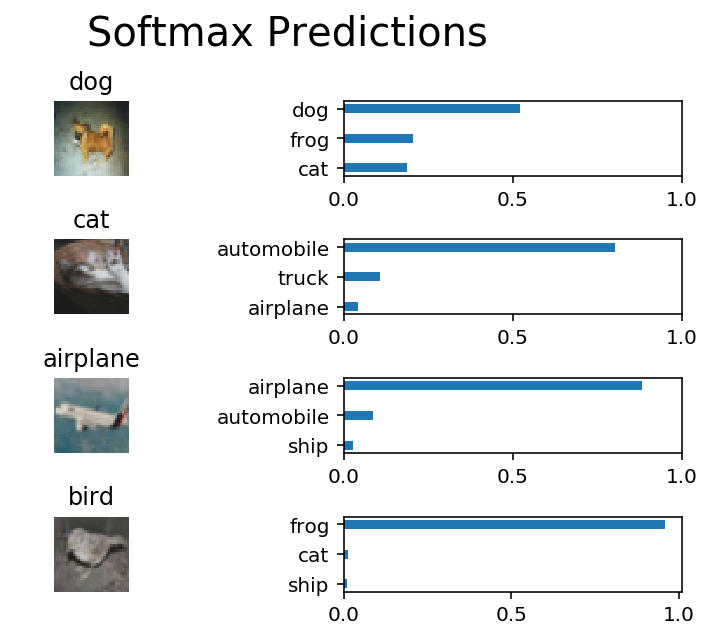

In [72]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-70% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 70%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.